In [51]:
import pickle
from Experiment1 import DataTest, DataRun

import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [76]:
data = pickle.load(open('output/RUN_DATA.p','rb'))

In [49]:
# Actual data of three conflict countries

tot_degree_type = {}
av_degree_type = {}
clus_coef_type = {}

# av total degree, av degree, av clus coef of three types

tot_degree_type['camp'] = [9,16,16]
tot_degree_type['conflict'] = [14,61,23]
tot_degree_type['hub'] = [35,48,15]
av_degree_type['camp'] = [1.8,1.143,2.286]
av_degree_type['conflict'] = [2,2.259,1.916]
av_degree_type['hub'] = [1.75,2.182,3]
clus_coef_type['camp'] = [0.067,0,0.6095]
clus_coef_type['conflict'] = [0,0.23,0.1528]
clus_coef_type['hub'] = [0.1116,0.061,0.1]

real_data = {}
real_data['tot_degree'] = tot_degree_type
real_data['av_degree'] = av_degree_type
real_data['av_clus_coef'] = clus_coef_type



In [68]:
def plot_simulated(prop, data, plot = 'fraction'):
    
    if prop == 'tot_degree_type' or prop == 'av_degree_type' or prop =='clus_coef_type':
        camp = []
        conflict = []
        hub = []
        for data_p in data:
            res = data_p.properties[prop]
            camp.append(res[0])
            conflict.append(res[1])
            hub.append(res[2])
        
        all_type = ['camp','conflict','hub']
        values = [camp, conflict, hub]
        for i in range(3):
            print('{} for {}: {} with SEM {}'.format(prop[:-5],all_type[i],np.mean(values[i]),stats.sem(values[i])))
        
        real = []
        if prop == 'tot_degree_type':
            real.append(real_data['tot_degree']['camp'])
            real.append(real_data['tot_degree']['conflict'])
            real.append(real_data['tot_degree']['hub'])
        elif prop == 'av_degree_type':
            real.append(real_data['av_degree']['camp'])
            real.append(real_data['av_degree']['conflict'])
            real.append(real_data['av_degree']['hub'])
        else:
            real.append(real_data['av_clus_coef']['camp'])
            real.append(real_data['av_clus_coef']['conflict'])
            real.append(real_data['av_clus_coef']['hub'])
        
        #plt.figure(figsize=(8,6),dpi=80)
        plt.boxplot([camp,conflict,hub])
        plt.scatter([1.3,1.3,1.3],real[0],marker = '*',color = 'r')
        plt.scatter([2.3,2.3,2.3],real[1],marker = '*',color = 'r')
        plt.scatter([3.3,3.3,3.3],real[2],marker = '*',color = 'r')
        plt.xticks([1,2,3],['Camp','Conflict zones', 'Hub'],fontsize=13)
        plt.ylabel(prop,fontsize=13)
        #plt.show()
    
    else:
        if plot =='fraction':
            #plt.figure(figsize=(8,6),dpi=80)
            res = []
            for data_p in data:
                plt.scatter(data_p.properties[prop],data_p.moment)
                res.append(data_p.properties[prop])
            print('{} : {} with SEM {}'.format(prop,np.mean(res),stats.sem(res)))
            plt.xlabel(prop,fontsize=13)
            plt.ylabel('Fraction',fontsize=13)
            #plt.show()
        
        else:
            plt.figure(figsize=(8,6),dpi=80)
            res = []
            for data_p in data:
                plt.scatter(data_p.properties[prop],data_p.angle)
                res.append(data_p.properties[prop])
            print('{} : {} with SEM {}'.format(prop,np.mean(res),stats.sem(res)))

            plt.xlabel(prop,fontsize=13)
            plt.ylabel('Slope',fontsize=13)
            #plt.show()
        
        

tot_degree for camp: 6.2 with SEM 0.3741657386773941
tot_degree for conflict: 14.0 with SEM 0.8366600265340755
tot_degree for hub: 30.2 with SEM 1.8814887722226779
av_degree for camp: 1.8333333333333335 with SEM 0.06972166887783962
av_degree for conflict: 2.506666666666667 with SEM 0.14544949486180947
av_degree for hub: 3.29 with SEM 0.1689304590652615
clus_coef for camp: 0.55 with SEM 0.1333333333333333
clus_coef for conflict: 0.48 with SEM 0.07022011248588872
clus_coef for hub: 0.33252380952380955 with SEM 0.042167086793099426


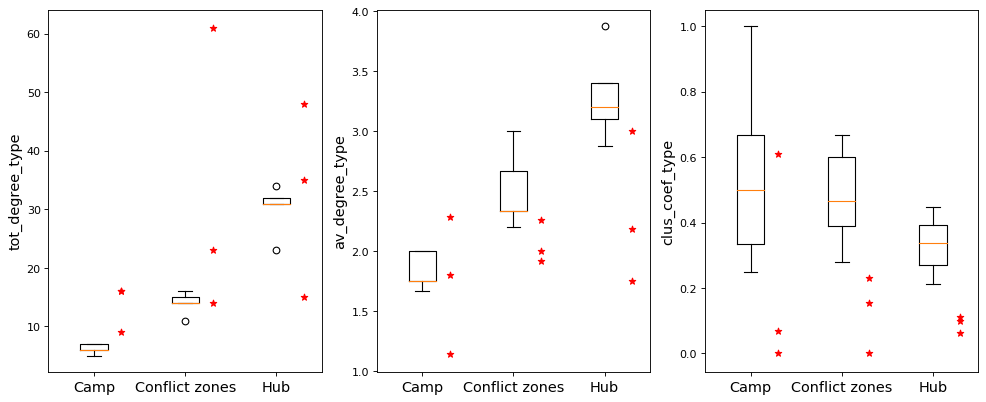

In [77]:
plt.figure(figsize=(15, 6),dpi=80)

plt.subplot(1,3,1)
plot_simulated('tot_degree_type',data,'fraction')
plt.subplot(1,3,2)
plot_simulated('av_degree_type',data,'fraction')
plt.subplot(1,3,3)
plot_simulated('clus_coef_type',data,'fraction')


clus_coef_tot : 0.4128686790505676 with SEM 0.03253574857344666


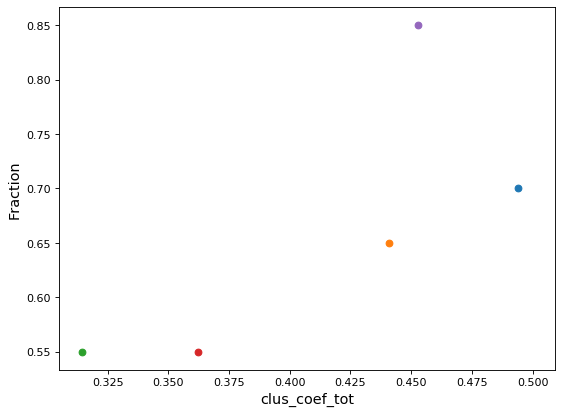

In [70]:
plot_simulated('clus_coef_tot',data,'fraction')

clus_coef_tot : 0.4128686790505676 with SEM 0.03253574857344666


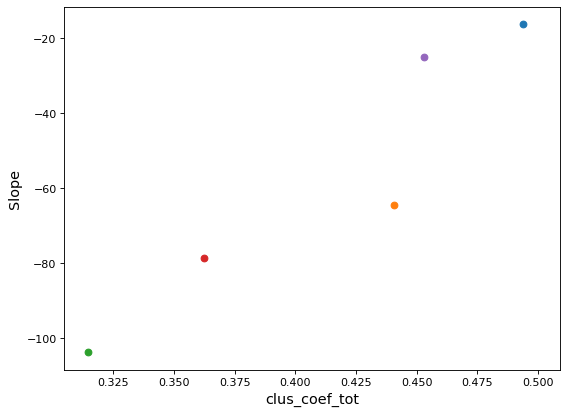

In [71]:
plot_simulated('clus_coef_tot',data,'angle')